## Imports

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold, cross_validate, train_test_split

## Feature and label separation

In [18]:
df = pd.read_csv("Model_input.csv")

In [19]:
X = df.drop(["Mental_health_category"], axis=1)
y = df["Mental_health_category"]

## Feature selection using PCA

In [29]:
# standardization is done bcz PCA is sensitive
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
pca = PCA(n_components=0.95) # 95% of variance preserved
X_pca = pca.fit_transform(X_scaled)

In [31]:
# select 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

In [32]:
print(f"Number of components: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

print(f"Selected features: {selected_features}")

Number of components: 27
Explained variance ratio: [0.16392012 0.08672904 0.05917993 0.04434165 0.04359878 0.04034131
 0.03742019 0.03553778 0.03306949 0.03244786 0.03086472 0.02929861
 0.02893931 0.02727046 0.02578032 0.02529645 0.02370608 0.02239102
 0.02200269 0.02095645 0.02047402 0.01841598 0.01792117 0.01705059
 0.01560462 0.01458321 0.01331162]
Selected features: Index(['Gender', 'Displacement', 'Displaced_months', 'Separated_from_parent',
       'Coping_playing_games/sports', 'Academic_performance_after',
       'Current_need_of_psychological_support',
       'Current_need_of_educational_materials', 'index_before', 'index_after'],
      dtype='object')


## Model building

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Model evaluation

In [35]:
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)

print(f"Model accuracy: {accuracy}")

Model accuracy: 0.9322033898305084


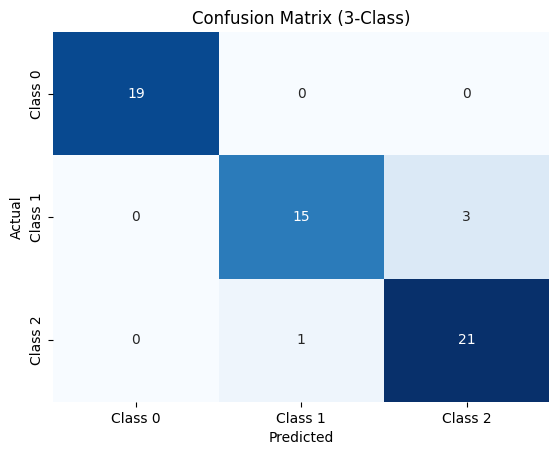

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (3-Class)')
plt.show()

In [38]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro', 'micro', or None
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


High recall minimizes the FN, while high precision minimizes the FP. While the dataset is considered to be balanced after applying CT-GAN, then the accuracy being 93% is great

In [39]:
# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        19
     Class 1       0.94      0.83      0.88        18
     Class 2       0.88      0.95      0.91        22

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



## Cross validation

In [41]:
# define k
k = 5

# Define metrics to compute
scoring = {'accuracy': 'accuracy', 'precision': 'precision_weighted', 'recall': 'recall_weighted', 'f1': 'f1_weighted'}

# Perform cross-validation
cv_results = cross_validate(model, X, y, cv=k, scoring=scoring)

# Print results
print(f"Cross-Validation Scores: {cv_results}")
print(f"CV Accuracy: {cv_results['test_accuracy'].mean():.2f}")
print(f"CV Precision: {cv_results['test_precision'].mean():.2f}")
print(f"CV Recall: {cv_results['test_recall'].mean():.2f}")
print(f"CV F1-Score: {cv_results['test_f1'].mean():.2f}")

Cross-Validation Scores: {'fit_time': array([0.24384212, 0.25366664, 0.24868655, 0.2521944 , 0.26440239]), 'score_time': array([0.0280087 , 0.03400254, 0.03155947, 0.03318167, 0.03982592]), 'test_accuracy': array([0.91525424, 0.96610169, 0.98305085, 0.98305085, 0.94827586]), 'test_precision': array([0.92127241, 0.96610169, 0.98382126, 0.98382126, 0.95502249]), 'test_recall': array([0.91525424, 0.96610169, 0.98305085, 0.98305085, 0.94827586]), 'test_f1': array([0.91495103, 0.96610169, 0.98303063, 0.98303063, 0.94798327])}
CV Accuracy: 0.96
CV Precision: 0.96
CV Recall: 0.96
CV F1-Score: 0.96
